<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Qualificacao/PSD_histogram_CNN_B_jun_23_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [2]:
!pip install mahotas

In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [9]:
df=Segmenta(img)
Img_Size = 28

In [10]:
print(df)

    Width           0           1  ...         781         782         783
0     191  173.630325  167.554810  ...  107.287117  112.845810  122.996414
1     119    1.290658    0.467128  ...    0.041522    0.702422    1.525952
2     174   90.534409   91.254990  ...    1.052187    0.163430    1.347734
3     100  102.416000  106.201599  ...    1.000000    1.000000    1.000000
4     155  111.213242  114.444542  ...    7.121208    1.657732    1.618855
5     170  132.322632  159.447357  ...    0.899239    0.157232    0.141453
6     164  159.761444  149.698990  ...  191.011322  210.444397  217.311722
7     130  197.958344  192.264145  ...  199.774200  179.581299  167.961899
8     159   78.188637   67.890236  ...    0.742811    0.263716    1.383213
9     132   65.763084   75.588615  ...    0.274564    0.516988    1.456382
10    166  204.519379  233.171417  ...  170.152695  166.214096  155.828552
11    144  150.335663  151.279327  ...  138.179016  150.580261  153.921295
12    137  181.581848  17

In [11]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [12]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [13]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [14]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

"\nmodel = MLPClassifier(hidden_layer_sizes=(200,10), activation='tanh', \n                      solver='adam',random_state=1, max_iter=300).fit(X_train,y_train)\n  \nprediction = model.predict(X_test)\n  \ny =np.copy(y_test)\ndata = {'y_true': y_test,'y_predict': prediction}  # este dado esta no formato de dicionario\n\ndf = pd.DataFrame(data, columns=['y_true','y_predict'])\n\n\nconfusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])\nprint(confusion_matrix)\n\ny_true = df['y_true']\ny_pred = df['y_predict']\n\n  \nMETRICS=sklearn.metrics.classification_report(y_true, y_pred)\n"

In [15]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

model = Sequential()


# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=200))
model.add(Dropout(0.2))
model.add(Dense(units=10))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:

# gives us back a <keras.callbacks.History object at 0x112e61a90>
model.fit(X_train, Y_train, epochs=200, batch_size=32)


Epoch 1/200
11/11 [==============================] - 18s 40ms/step - loss: 0.7983 - accuracy: 0.5576
Epoch 2/200
11/11 [==============================] - 0s 39ms/step - loss: 0.4030 - accuracy: 0.8289
Epoch 3/200
11/11 [==============================] - 0s 39ms/step - loss: 0.3302 - accuracy: 0.8948
Epoch 4/200
11/11 [==============================] - 0s 39ms/step - loss: 0.2239 - accuracy: 0.9089
Epoch 5/200
11/11 [==============================] - 0s 39ms/step - loss: 0.1261 - accuracy: 0.9542
Epoch 6/200
11/11 [==============================] - 0s 40ms/step - loss: 0.1248 - accuracy: 0.9438
Epoch 7/200
11/11 [==============================] - 0s 40ms/step - loss: 0.0766 - accuracy: 0.9756
Epoch 8/200
11/11 [==============================] - 0s 39ms/step - loss: 0.0629 - accuracy: 0.9872
Epoch 9/200
11/11 [==============================] - 0s 40ms/step - loss: 0.0359 - accuracy: 0.9892
Epoch 10/200
11/11 [==============================] - 0s 39ms/step - loss: 0.0286 - accuracy: 0.986

In [17]:
Y_test = yback(Y_test)

In [18]:
pred_test= model.predict_classes(X_test)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predict   0   1
Actual         
0        68   4
1         1  74


In [19]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [20]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  prediction = model.predict_classes(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
1   137.0  103.430649   53.760666  ...  121.954170  121.712982  117.591713
2   141.0   23.447813   23.533422  ...   40.927670   36.023842   34.149090
3   186.0   45.336224   65.845879  ...   75.484688   78.045212   82.606659
4   190.0    1.671690    1.006205  ...  137.572510   79.255615   65.631241
5   156.0   62.159767   77.289284  ...  119.680473  121.566734  134.122955
6   112.0   82.750000   79.062500  ...   52.312500   52.437500   53.000000
7   149.0  141.593094  168.861313  ...   65.930321   71.665054   76.468178
8   163.0   74.655502   76.005493  ...   69.232376   90.095490   99.536865
9   177.0   82.647163   87.161888  ...    5.344473    5.964728    5.378435
10  146.0  122.257652  117.968285  ...  102.014259  103.250519  107.032455
11  192.0   43.239582   48.967010  ...   89.809891   93.657547   95.496956
12  103.0   26.547459   23.771324  ...   83.099815   80.416153   77.386841
13  158.0  114.291939  11

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [21]:
Width=np.array(Width_new)

In [22]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

fatal: destination path 'marquesgabi_paper_fev_2021' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [23]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

fatal: destination path 'marquesgabi_out_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [24]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [25]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
1,137.0,103.430649,53.760666,50.854012,48.629387,48.991104,50.751984,51.366028,51.754322,47.253292,41.794289,38.823006,43.286324,47.026901,47.882145,48.977409,51.775959,53.746758,66.033409,77.187271,74.138733,73.802010,74.759125,66.350204,61.699875,56.952099,55.496616,51.931267,51.791145,141.071442,88.594269,53.134796,51.065742,50.616974,50.126694,50.236931,53.912994,54.083057,47.462997,36.585060,...,97.989662,101.417435,103.848213,106.690025,109.368370,111.995781,120.132927,122.853477,122.099197,121.737862,116.729019,115.773399,88.029083,77.175339,61.633541,47.889923,54.749054,60.679466,64.601898,65.095474,63.113697,60.078800,53.200863,47.334698,58.793167,81.732910,95.975380,100.270874,103.105652,101.620850,102.480202,105.471207,108.071777,110.565987,116.203583,119.996109,120.310509,121.954170,121.712982,117.591713
2,141.0,23.447813,23.533422,25.956593,32.852417,40.458683,47.837681,49.195515,46.405914,48.771992,53.455563,62.639660,76.738953,85.865150,91.481064,92.484581,95.350235,98.233444,104.846100,107.735168,112.431221,109.115433,97.371857,77.612892,68.930138,68.383080,67.217041,61.611694,60.560741,23.445202,21.373171,21.284695,29.941200,45.184799,50.399933,57.280319,60.685982,62.867062,60.470295,70.841156,...,75.014191,68.376396,70.092705,70.579704,70.051407,70.209854,68.515419,59.612442,40.193604,33.166092,32.602386,30.536896,23.647905,25.010410,31.294853,59.181885,75.590668,83.673958,88.470657,98.061813,106.783249,113.709061,134.895889,134.038071,132.119659,127.714050,117.626488,90.912033,76.880692,68.061516,70.142593,72.434738,71.526077,72.533379,71.471802,70.429207,63.168705,40.927670,36.023842,34.149090
3,186.0,45.336224,65.845879,79.964966,85.256676,86.166969,98.538795,104.769569,102.922424,98.610252,97.216789,99.147888,99.763443,98.694542,80.078285,43.280842,32.650017,27.754309,32.027172,42.404442,65.972481,74.085800,76.244194,76.103951,75.316574,76.387566,83.750961,90.281891,91.950752,56.572208,88.322014,97.333237,96.743561,92.959885,99.968788,106.593605,105.474869,102.413925,102.502258,100.569778,...,35.033882,63.701008,72.859299,75.401787,74.556374,72.922195,73.759857,74.374962,74.745178,77.676147,83.028442,88.038040,93.469994,94.815125,91.845421,94.186508,92.504112,89.756042,87.402603,83.990646,85.640541,87.466423,95.065445,111.889603,130.777206,142.554535,135.302353,113.845764,63.602966,77.149269,76.018280,70.648170,72.511734,73.635338,74.253105,73.914101,75.129272,75.484688,78.045212,82.606659
4,190.0,1.671690,1.006205,2.783380,14.304265,47.044868,57.798332,61.084759,68.334396,72.408524,74.224159,80.250969,81.011086,55.751019,48.844208,58.780380,99.528961,93.562775,78.545586,71.597565,93.185585,89.788147,62.056950,61.819500,69.638893,81.090744,91.767525,92.837334,84.311691,1.862936,1.315346,7.970526,46.236229,58.421490,62.564430,65.028915,69.075455,73.128532,76.592896,79.752800,...,108.948479,118.623367,117.191360,113.733192,117.368637,120.622047,117.452393,120.918770,119.837334,79.981377,65.669128,68.052734,71.589577,84.667915,84.201103,84.698837,81.891747,78.200661,94.454834,97.146698,88.432686,84.396339,80.696617,77.774742,79.222824,83.990242,87.589912,95.181267,109.269135,113.968536,113.017838,115.935730,120.696281,122.123650,115.969643,120.344147,131.231461,137.572510,79.255615,65.631241
5,156.0,62.159767,77.289284,77.316902,71.280083,64.382645,66.715981,66.957268,66.984879,69.023010,73.035507,72.118340,68.239319,61.300461,38.900066,24.124262,32.921108,46.180805,57.689682,59.341221,58.666664,58.898754,57.330044,57.500328,56.453648,54.955948,53.652863,54.796848,58.391853,48.805393,73.519402,74.827095,68.830376,57.382645,56.249836,63.276798,66.837608,67.597641,68.487839,69.124268,...,94.725182,107.577911,113.159111,113.178833,113.325

In [26]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

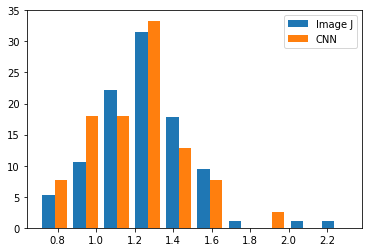

In [27]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

<a list of 2 Lists of Patches objects>
[0.70327958 0.86469554 1.0261115  1.18752746 1.34894342 1.51035938
 1.67177534 1.83319131 1.99460727 2.15602323 2.31743919]
[[ 5.26315789 10.52631579 22.10526316 31.57894737 17.89473684  9.47368421
   1.05263158  0.          1.05263158  1.05263158]
 [ 7.69230769 17.94871795 17.94871795 33.33333333 12.82051282  7.69230769
   0.          2.56410256  0.          0.        ]]


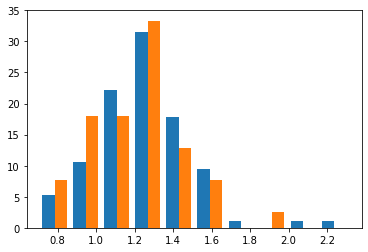

In [28]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [29]:
print(counts.sum())

200.00000000000014


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


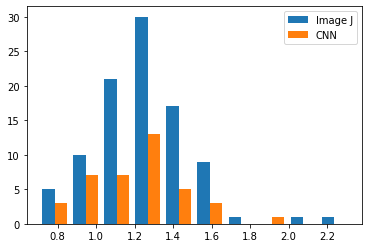

In [30]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [31]:
[Diam1,Diameter_All]

[[1.59616801403081,
  1.0217907939900581,
  1.2716187407449044,
  1.104429030701514,
  1.2163487785097904,
  1.6013445735058454,
  1.1715597420637607,
  1.2534662333717612,
  1.2676073151634049,
  1.309600575274104,
  1.292966945531582,
  1.7658322811231006,
  1.3564037533648712,
  1.2407040781688483,
  2.130217298173151,
  1.4228319915327,
  1.0651086490865755,
  1.3008210311003705,
  1.336545951796433,
  0.8927754224911278,
  1.4494292838262302,
  1.4052738287907582,
  1.6421697097891788,
  1.2329833804288621,
  1.19042665178928,
  1.1682948223612457,
  1.1518314137121108,
  0.9607802401865855,
  2.317439190074449,
  1.0591147430338594,
  1.4308630919602832,
  0.7535680705496237,
  0.8608283307581511,
  1.2776122636975893,
  1.3745862957220916,
  1.259546137598783,
  1.2978813187979172,
  1.2412170838050638,
  1.6009469708743893,
  1.3149369953539032,
  1.417901703622935,
  1.2478669653497139,
  1.1055812783082735,
  0.9561307405997607,
  0.9487783503683882,
  1.1238565871041026,
  1